In [1]:
# Import all necessary packages
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import scipy as scipy
import time
import pandas as pd
from sklearn.linear_model import LinearRegression
import re
import multiprocessing
import validators 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from itertools import combinations
from itertools import repeat
from statistics import mean
import multiprocessing
import modelcrit as m

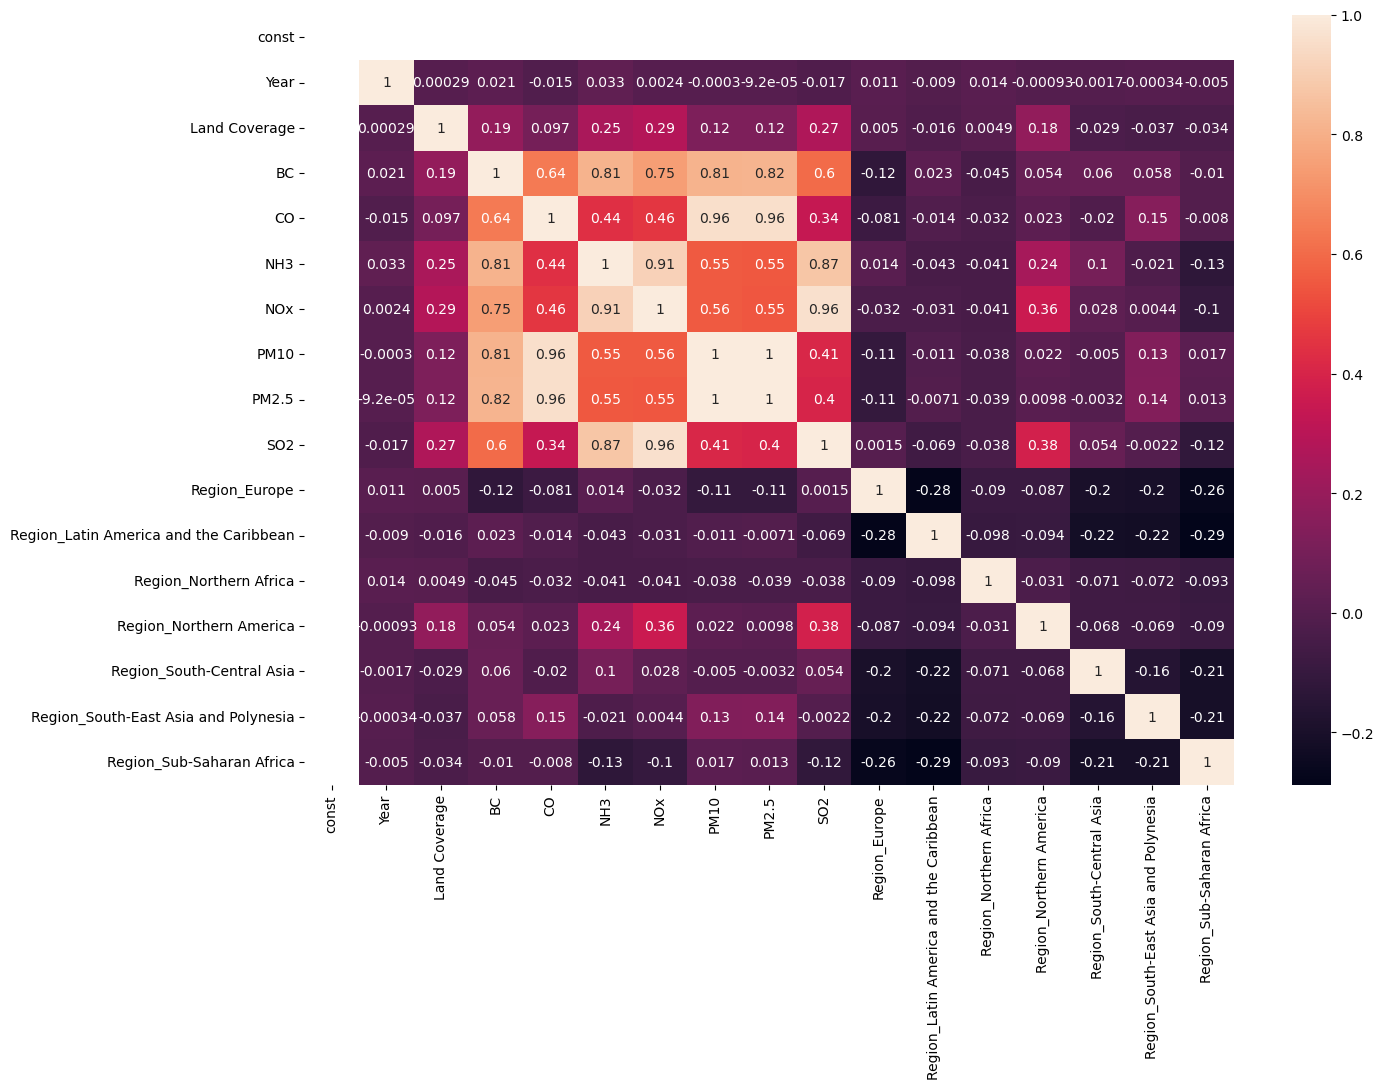

In [2]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.subplots(figsize=(15,10))
sn.heatmap(m.x.corr(), annot = True)
plt.show()

In [3]:
(m.x).shape

(49033, 17)

In [4]:
def format_combinations(comb):
    outputlist = []
    for i in range(0,len(comb)):
        outputlist.append(list(comb[i]))
    return(outputlist)

pool = multiprocessing.Pool(processes=4)
DF = pd.DataFrame()
for k in range(2,18):
    comb =list(combinations([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,16], k))
    outputlist = format_combinations(comb)
    K_List = pool.starmap(m.Get_Combinatorial,zip(outputlist))
    ArrangedDf = m.Get_List(K_List)
    print(k,'comb done!')
    DF = pd.concat([DF,ArrangedDf], ignore_index = True)

2 comb done!
3 comb done!
4 comb done!
5 comb done!
6 comb done!
7 comb done!
8 comb done!
9 comb done!
10 comb done!
11 comb done!
12 comb done!
13 comb done!
14 comb done!
15 comb done!
16 comb done!
17 comb done!


In [22]:
DF.sort_values(by = ["AIC"], ascending=False)
DF.sort_values(by = ["BIC"], ascending=False)

,Dependent,Independent,AIC,BIC,R-Squared,VIF
31,Surface Temperature Change,"[Land Coverage, CO]",525846.384182,525863.98468,0.589023,0.410977
40,Surface Temperature Change,"[Land Coverage, Region_Northern America]",525844.239301,525861.839799,0.585967,0.414033
65,Surface Temperature Change,"[CO, Region_Northern America]",525772.382741,525789.983238,0.590148,0.409852
90,Surface Temperature Change,"[PM10, PM2.5]",525695.821349,525713.421846,0.590589,0.409411
60,Surface Temperature Change,"[CO, PM2.5]",525276.191366,525293.791864,0.592602,0.407398
...,...,...,...,...,...,...
130568,Surface Temperature Change,"[const, Year, Land Coverage, NH3, NOx, PM2.5, ...",447358.466868,447481.670352,0.668483,0.331517
130537,Surface Temperature Change,"[const, Year, Land Coverage, CO, NH3, NOx, SO2...",447357.078255,447480.281738,0.668464,0.331536
130567,Surface Temperature Change,"[const, Year, Land Coverage, NH3, NOx, PM10, S...",447356.920249,447480.123733,0.668462,0.331538
131033,Surface Temperature Change,"[const, Year, Land Coverage, BC, NH3, NOx, PM1...",447334.229265,447475.033247,0.668098,0.331902


In [31]:
DF.to_csv(r'/Users/benjaminsionit/Downloads/AICBICFinal.gzip', index=False, header=True,compression='gzip')
checkDF = '/Users/benjaminsionit/Downloads/AICBICFinal.gzip'
checkDF = pd.read_csv(checkDF, compression='gzip')

In [32]:
checkDF.sort_values(by = ["AIC"], ascending=False)
checkDF.sort_values(by = ["BIC"], ascending=False)

,Dependent,Independent,AIC,BIC,R-Squared,VIF
31,Surface Temperature Change,"['Land Coverage', 'CO']",525846.384182,525863.984680,0.589023,0.410977
40,Surface Temperature Change,"['Land Coverage', 'Region_Northern America']",525844.239301,525861.839799,0.585967,0.414033
65,Surface Temperature Change,"['CO', 'Region_Northern America']",525772.382741,525789.983238,0.590148,0.409852
90,Surface Temperature Change,"['PM10', 'PM2.5']",525695.821349,525713.421846,0.590589,0.409411
60,Surface Temperature Change,"['CO', 'PM2.5']",525276.191366,525293.791864,0.592602,0.407398
...,...,...,...,...,...,...
130568,Surface Temperature Change,"['const', 'Year', 'Land Coverage', 'NH3', 'NOx...",447358.466868,447481.670352,0.668483,0.331517
130537,Surface Temperature Change,"['const', 'Year', 'Land Coverage', 'CO', 'NH3'...",447357.078255,447480.281738,0.668464,0.331536
130567,Surface Temperature Change,"['const', 'Year', 'Land Coverage', 'NH3', 'NOx...",447356.920249,447480.123733,0.668462,0.331538
131033,Surface Temperature Change,"['const', 'Year', 'Land Coverage', 'BC', 'NH3'...",447334.229265,447475.033247,0.668098,0.331902


In [42]:
print(DF.iloc[130976].Independent)
best_model = m.X_variables[DF.iloc[130976].Independent]
y = m.y

['const', 'Year', 'Land Coverage', 'NH3', 'NOx', 'PM10', 'PM2.5', 'SO2', 'Region_Europe', 'Region_Latin America and the Caribbean', 'Region_Northern Africa', 'Region_Northern America', 'Region_South-Central Asia', 'Region_South-East Asia and Polynesia', 'Region_Sub-Saharan Africa']


In [43]:
# Cacculating beta parameter using SVD Decomposition
def SVD_Decomp(model,y):
    a = model.T @ model
    Xty = (model.T @ y)
    n = model.shape[0]
    k = model.shape[1]
    # SVD decomp
    start = time.time()
    u, s, vh = np.linalg.svd(a,full_matrices=False)
    smat = np.diag(s)
    smatinv = np.diag((1/(s)))
    uinv = np.linalg.inv(u)
    vhinv = np.linalg.inv(vh)
    # Calculating beta
    VhSMatU_Inv_Prod = (vhinv @ smatinv @ uinv)
    beta1 = VhSMatU_Inv_Prod @ Xty
    K1 = y - (model)@beta1
    var1 = (K1.T @ K1)/(n - k) # Calculating variance
    std_error1 = var1 * np.diag(VhSMatU_Inv_Prod) # Calculating standard error
    end = time.time()
    df = pd.DataFrame({'time': [end - start],"beta": [beta1], "standard error": [std_error1]})
    return(df)

In [44]:
# Cacculating beta parameter using LU Decomposition
def LU_Decomp(model,y):
    a = model.T @ model
    Xty = (model.T @ y)
    n = model.shape[0]
    k = model.shape[1]
    # LU Decomposition
    start = time.time()
    P, L, U = scipy.linalg.lu(a)
    Pinv =  np.linalg.inv(P)
    Uinv =  np.linalg.inv(U)
    Linv =  np.linalg.inv(L)
    PLU_Inv_Prod = (Uinv @ Linv @ Pinv)
    # Calculating beta
    beta2 = PLU_Inv_Prod @ Xty
    K2 = y - (model)@beta2
    var2 = (K2.T @ K2)/(n-k)# Calculating variance
    std_error2 = var2 * np.diag(PLU_Inv_Prod) # Calculating standard error
    end = time.time()
    df = pd.DataFrame({'time': [end - start],"beta": [beta2], "standard error": [std_error2]})
    return(df)

In [45]:
# Cacculating beta parameter using Cholesky Decomposition
def Cholesky_Decomp(model,y):
    # Cholesky decomposition
    a = model.T @ model
    Xty = (model.T @ y)
    n = model.shape[0]
    k = model.shape[1]
    start = time.time()
    L = np.linalg.cholesky(a)
    Linv = np.linalg.inv(L)
    LLt_Inv_Prod = (Linv.T @ Linv)
    beta3 = LLt_Inv_Prod @ Xty
    K3 = y - (model)@beta3
    var3 = (K3.T @ K3)/(n-k)# Calculating variance
    std_error3 = var3 * np.diag((LLt_Inv_Prod)) # Calculating standard error
    end = time.time()
    df = pd.DataFrame({'time': [end - start],"beta": [beta3], "standard error": [std_error3]})
    return(df)

In [46]:
# Cacculating beta parameter using QR Decomposition
def QR_Decomp(model,y):
    a = model.T @ model
    Xty = (model.T @ y)
    n = model.shape[0]
    k = model.shape[1]
    # QR Decomposition
    start = time.time()
    Q, R = scipy.linalg.qr(a)
    Qinv = np.linalg.inv(Q)
    Rinv = np.linalg.inv(R)
    RQ_Inv_Prod = (Rinv @ Qinv)
    # Calculating beta
    beta4 = RQ_Inv_Prod @ Xty
    K4 = y - (model)@beta4
    var4 = (K4.T @ K4)/(n-k)# Calculating variance
    std_error4 = var4 * np.diag(RQ_Inv_Prod) # Calculating standard error
    end = time.time()
    df = pd.DataFrame({'time': [end - start],"beta": [beta4], "standard error": [std_error4]})
    return(df)

In [ ]:
# Cacculating beta parameter using gradient descent
def gradient_descent(x, y):
    # Initializing guess, error, # iterations, alpha, and norm 
    initial = np.zeros(x.shape[1])
    iterations = 1000
    error = 10^-3
    alpha = 0.0001
    norm = 0
    n = len(x)
    # Updating using gradient descent algorithm
    for i in range(0, iterations):
        y_pred = x@initial
        mse = 2*(x.T@x@initial - 2*x.T@y)
        new = initial - (alpha * mse)
        norm = np.sum((initial - new)**2)
        initial = new
    return(new)

In [49]:
list(LU_Decomp(best_model,y)['beta'])

[array([-6.21576361e+01,  3.12520912e-02,  4.88574313e-07, -1.21542700e-04,
         5.18445499e-04, -6.29531497e-04,  8.54691904e-04, -5.57958922e-04,
         6.12421319e-01,  1.69997297e-01,  6.92125951e-01,  3.76471966e-01,
         2.91327332e-01,  1.38636527e-01,  3.30192794e-01])]

In [50]:
list(Cholesky_Decomp(best_model,y)['beta'])

[array([-6.21576361e+01,  3.12520912e-02,  4.88574313e-07, -1.21542700e-04,
         5.18445499e-04, -6.29531497e-04,  8.54691904e-04, -5.57958922e-04,
         6.12421319e-01,  1.69997297e-01,  6.92125951e-01,  3.76471966e-01,
         2.91327332e-01,  1.38636527e-01,  3.30192794e-01])]

In [51]:
list(QR_Decomp(best_model,y)['beta'])

[array([-6.21576236e+01,  3.12520849e-02,  4.88574304e-07, -1.21542678e-04,
         5.18445538e-04, -6.29531313e-04,  8.54691630e-04, -5.57959071e-04,
         6.12421308e-01,  1.69997285e-01,  6.92125944e-01,  3.76471958e-01,
         2.91327320e-01,  1.38636519e-01,  3.30192782e-01])]

In [52]:
list(SVD_Decomp(best_model,y)['beta'])

[array([-6.21576549e+01,  3.12521005e-02,  4.88574327e-07, -1.21542733e-04,
         5.18445441e-04, -6.29531773e-04,  8.54692314e-04, -5.57958697e-04,
         6.12421335e-01,  1.69997316e-01,  6.92125963e-01,  3.76471978e-01,
         2.91327349e-01,  1.38636539e-01,  3.30192811e-01])]

In [63]:
np.matrix(best_model).shape
gradient_descent(np.matrix(best_model).T,np.matrix(y))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 15)

In [53]:
count1 = 0
count2 = 0
count3 = 0
count4 = 0
for x in range(0,100):
    time1 = float(SVD_Decomp(best_model,y)['time'])
    time2 = float(LU_Decomp(best_model,y)['time'])
    time3 = float(Cholesky_Decomp(best_model,y)['time'])
    time4 = float(QR_Decomp(best_model,y)['time'])
    lists = np.asarray([time1,time2,time3,time4])
    minimum = np.ndarray.min(lists)
    if(time1 == minimum):
        count1 = count1 + 1
    elif(time2 == minimum):
        count2 = count2 + 1
    elif(time3 == minimum):
        count3 = count3 + 1
    elif(time4 == minimum):
        count4 = count4 + 1
print(count1,count2,count3,count4)

8 29 46 17


In [68]:
X_variables = m.X_variables
m.X_variables[DF.iloc[130976].Independent]

,const,Year,Land Coverage,NH3,NOx,PM10,PM2.5,SO2,Region_Europe,Region_Latin America and the Caribbean,Region_Northern Africa,Region_Northern America,Region_South-Central Asia,Region_South-East Asia and Polynesia,Region_Sub-Saharan Africa
0,1.0,1992,69.264629,3.039674,16.088104,2.143882,1.854832,2.794095,0,0,0,0,1,0,0
1,1.0,1992,84.831480,0.263843,0.281613,0.009401,0.004620,0.282423,0,1,0,0,0,0,0
2,1.0,1992,76.205103,0.000058,0.011386,0.000237,0.000236,0.001254,0,1,0,0,0,0,0
3,1.0,1992,95.192667,26.216038,2.508253,0.727263,0.505179,0.522469,1,0,0,0,0,0,0
4,1.0,1992,85.735300,253.204942,438.673385,2215.204432,1549.418839,69.100699,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49028,1.0,2018,27.909300,61.522615,19.284819,52.477207,30.016152,11.528146,0,0,0,0,0,0,1
49029,1.0,2018,18.337500,61.522615,19.284819,52.477207,30.016152,11.528146,0,0,0,0,0,0,1
49030,1.0,2018,90.625800,61.522615,19.284819,52.477207,30.016152,11.528146,0,0,0,0,0,0,1
49031,1.0,2018,11645.811900,61.522615,19.284819,52.477207,30.016152,11.528146,0,0,0,0,0,0,1


In [133]:
BetaDf = pd.DataFrame(columns = ["Beta0","Beta1", "Beta2", "Beta3", "Beta4", "Beta5","Beta6", "Beta7", "Beta8", "Beta9", "Beta10","Beta11", "Beta12", "Beta13", "Beta14"])
SEDf = pd.DataFrame(columns = ["SE0","SE1", "SE2", "SE3", "SE4", "SE5","SE6", "SE7", "SE8", "SE9", "SE10","SE11", "SE12", "SE13", "SE14"])
X_variables["Surface Temperature Change"] = y
NumSim = 1000
for i in range(0,NumSim):
    Simulation_Study = X_variables.iloc[np.random.randint(0, 49032,2452)]
    SimX = Simulation_Study[DF.iloc[130976].Independent]
    SimY = Simulation_Study['Surface Temperature Change']
    BetaRowDf = pd.DataFrame(pd.Series.explode(Cholesky_Decomp(SimX,SimY)['beta'])).T
    SERowDf = pd.DataFrame(pd.Series.explode(Cholesky_Decomp(SimX,SimY)['standard error'])).T
    BetaRowDf.columns = ["Beta0","Beta1", "Beta2", "Beta3", "Beta4", "Beta5","Beta6", "Beta7", "Beta8", "Beta9", "Beta10","Beta11", "Beta12", "Beta13", "Beta14"]
    SERowDf.columns = ["SE0","SE1", "SE2", "SE3", "SE4", "SE5","SE6", "SE7", "SE8", "SE9", "SE10","SE11", "SE12", "SE13", "SE14"]
    BetaDf = pd.concat([BetaDf,BetaRowDf])
    SEDf = pd.concat([SEDf,SERowDf])
[BetaHat0, BetaHat1, BetaHat2, BetaHat3, BetaHat4, BetaHat5, BetaHat6, BetaHat7, BetaHat8, BetaHat9, BetaHat10, BetaHat11, BetaHat12, BetaHat13, BetaHat14] = list(np.concatenate(Cholesky_Decomp(best_model,y)['beta']).flat)
[SEHat0, SEHat1, SEHat2, SEHat3, SEHat4, SEHat5, SEHat6, SEHat7, SEHat8, SEHat9, SEHat10, SEHat11, SEHat12, SEHat13, SEHat14] = list(np.concatenate(Cholesky_Decomp(best_model,y)['standard error']).flat)

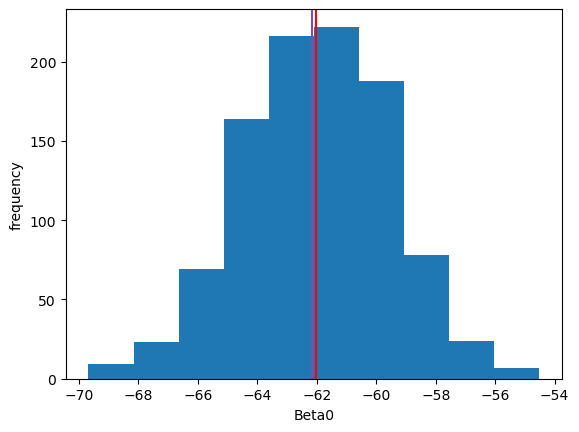

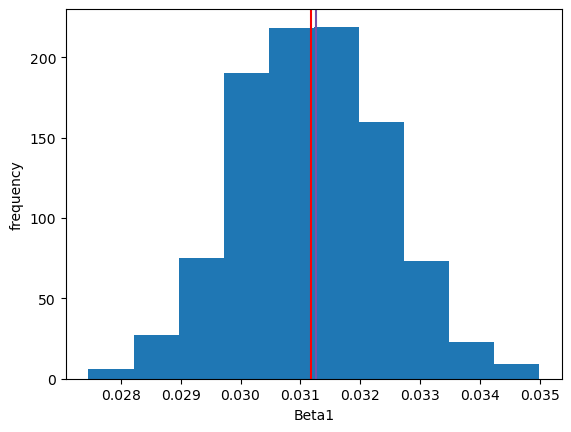

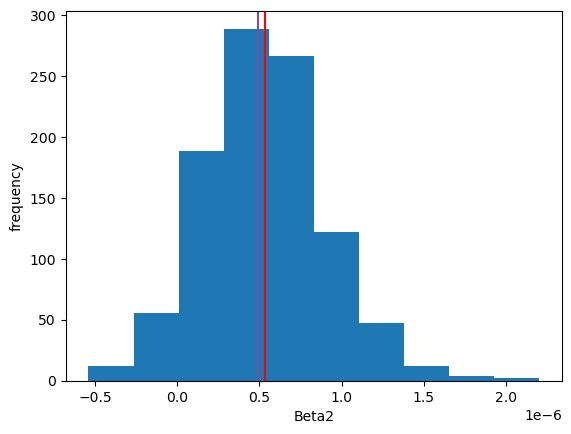

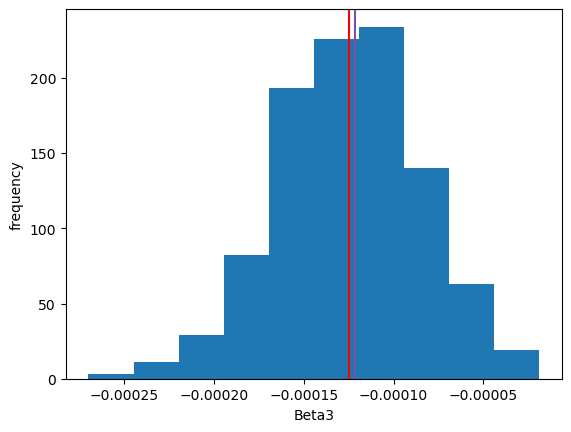

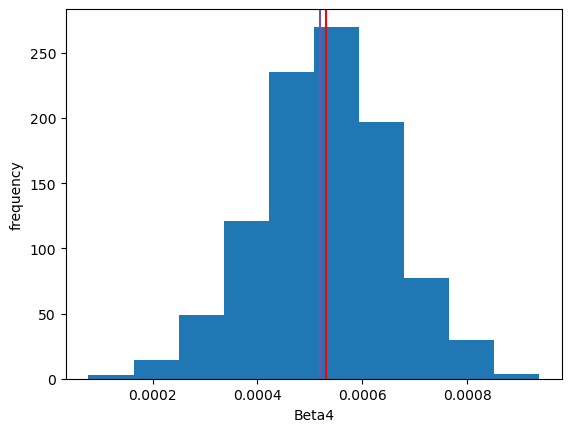

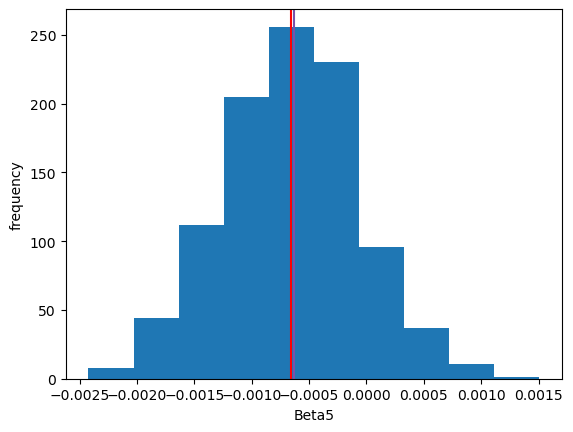

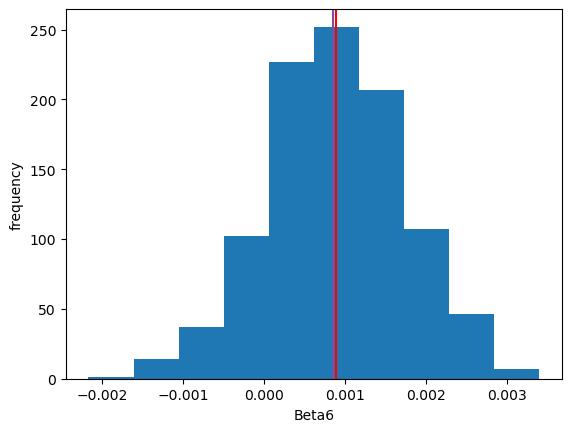

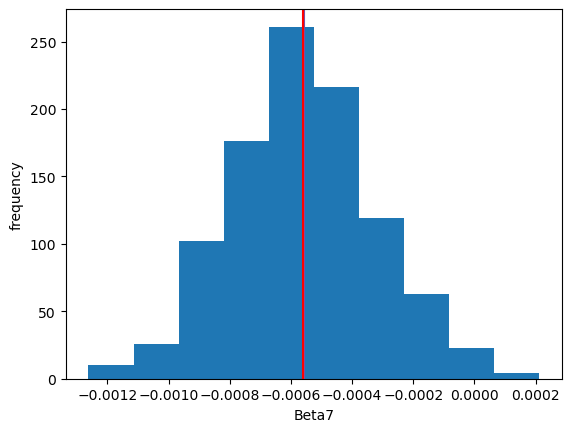

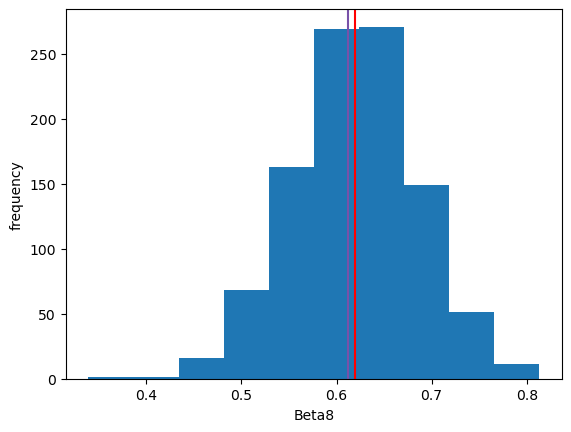

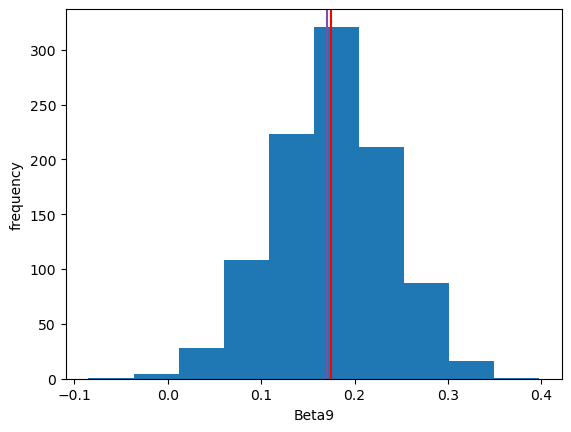

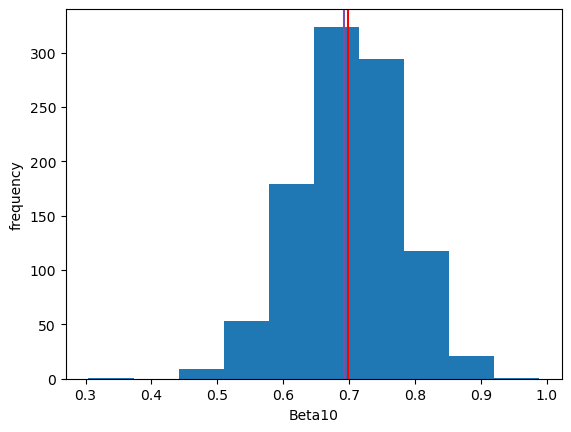

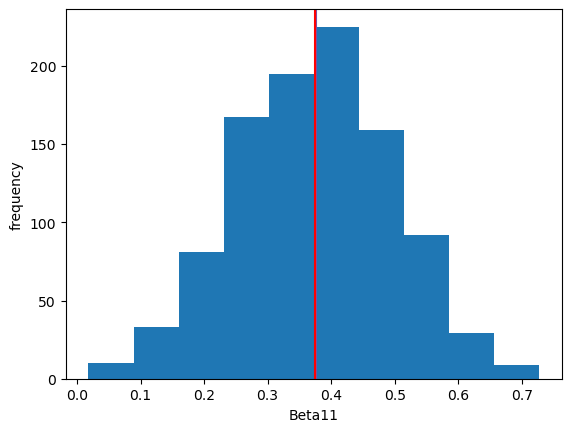

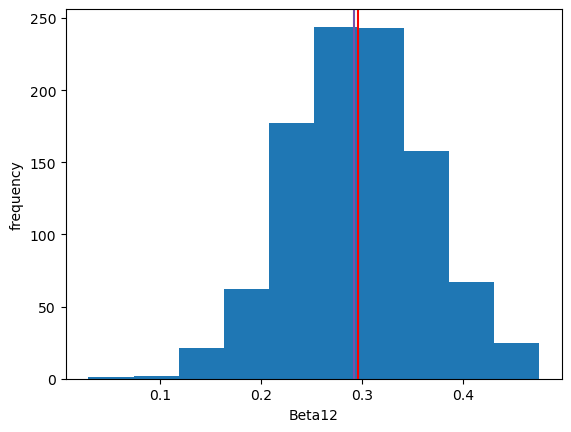

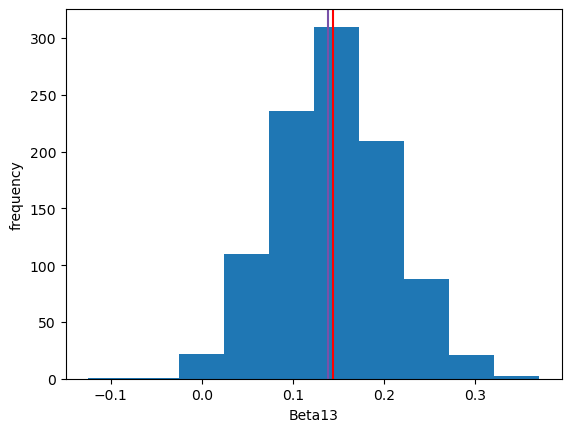

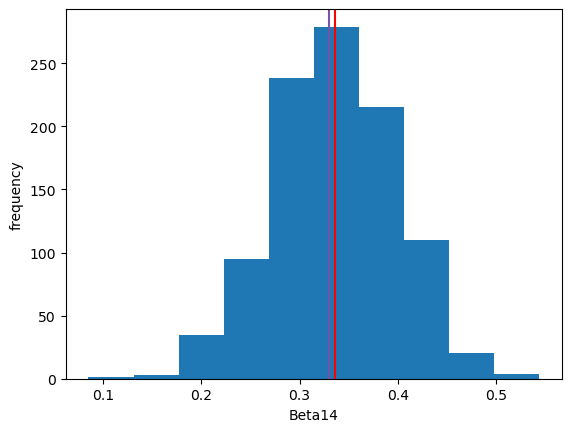

In [134]:
BetaNames = ["Beta0","Beta1", "Beta2", "Beta3", "Beta4", "Beta5","Beta6", "Beta7", "Beta8", "Beta9", "Beta10","Beta11", "Beta12", "Beta13", "Beta14"]
BetaHatNames = [BetaHat0, BetaHat1, BetaHat2, BetaHat3, BetaHat4, BetaHat5, BetaHat6, BetaHat7, BetaHat8, BetaHat9, BetaHat10, BetaHat11, BetaHat12, BetaHat13, BetaHat14]
SENames = ["SE0","SE1", "SE2", "SE3", "SE4", "SE5","SE6", "SE7", "SE8", "SE9", "SE10","SE11", "SE12", "SE13", "SE14"]
SEHatNames = [SEHat0, SEHat1, SEHat2, SEHat3, SEHat4, SEHat5, SEHat6, SEHat7, SEHat8, SEHat9, SEHat10, SEHat11, SEHat12, SEHat13, SEHat14]

for i in range(0,len(BetaNames)):
    mpl.pyplot.hist(BetaDf[BetaNames[i]])
    plt.axvline(x = BetaHatNames[i], color = '#7851a9', label = 'axvline - full height')
    plt.axvline(x = mean(BetaDf[BetaNames[i]]), color = 'r', label = 'axvline - full height')
    mpl.pyplot.xlabel(BetaNames[i])
    mpl.pyplot.ylabel('frequency')
    mpl.pyplot.show()

In [135]:
for i in range(0,len(BetaNames)):
    sortedBetas = BetaDf[BetaNames[i]].sort_values()
    print("The 96% CI for",BetaNames[i],"is ",(sortedBetas[int(.02 * NumSim)],sortedBetas[int(.98*NumSim)]))
    if(np.sign(sortedBetas[int(.02 * NumSim)])*np.sign(sortedBetas[int(.98 * NumSim)]) == -1):
        print("Since this CI contains 0",BetaNames[i], "is not significant")

The 96% CI for Beta0 is  (-67.16306080403592, -56.92076555900712)
The 96% CI for Beta1 is  (0.028653902529704567, 0.033763716907643015)
The 96% CI for Beta2 is  (-1.7461609430075443e-07, 1.3664794514916108e-06)
Since this CI contains 0 Beta2 is not significant
The 96% CI for Beta3 is  (-0.0002112050218807393, -4.441363937446319e-05)
The 96% CI for Beta4 is  (0.00026429311936906896, 0.0007951548524267882)
The 96% CI for Beta5 is  (-0.001813896395946299, 0.0006420480801986317)
Since this CI contains 0 Beta5 is not significant
The 96% CI for Beta6 is  (-0.0009559310803131105, 0.0025441028887385198)
Since this CI contains 0 Beta6 is not significant
The 96% CI for Beta7 is  (-0.0010193836280629753, -4.292607398870274e-05)
The 96% CI for Beta8 is  (0.4829621005268283, 0.7509902423621035)
The 96% CI for Beta9 is  (0.05235242044365762, 0.29399527894423727)
The 96% CI for Beta10 is  (0.5312917117832825, 0.8545807109792314)
The 96% CI for Beta11 is  (0.11560576893423935, 0.6208587881320113)
The 

In [136]:
best_model.columns[[2,5,6]]

Index(['Land Coverage', 'PM10', 'PM2.5'], dtype='object')

In [ ]:
#add a lag to the carbon variables, dummy variable is fine, we can run a lin reg

In [ ]:
initial = np.zeros(x.shape[1])
iterations = 1000
error = 10^-3
alpha = 10^-16
norm = 0
n = len(x)
for i in range(0, iterations):
    y_pred = x@initial
    mse = x.T@x@initial - x.T@y
    new = initial - (alpha * mse)
    print(np.sum((initial - new)**2))
    initial = new

In [ ]:
gradient_descent(x, y)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x.iloc[:, 5], y)
plt.scatter(x.iloc[:, 6], y)
plt.scatter(x.iloc[:, 7], y)

In [ ]:
z = final.groupby("Year").sum()
m = z["Surface Temperature Change"]
s = z.iloc[:, [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]]

,time,beta,standard error
0,0.001415,"[-62.15763614663592, 0.031252091158474826, 4.8...","[0.25762993428940834, 6.404821189594414e-08, 3..."
